# Terrorism mini project

Goal: answer five questions. The questions I ask may depend on answers to previous questions.

## Data source:
[Kaggle. Follow this link for any further information.](https://www.kaggle.com/START-UMD/gtd)

## Importing the data structure
Data structure is a CSV file with over 100 variables on location, tactics, perpetrators, targets, and outcomes of the terrorism attacks.

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
try:
    data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', usecols=range(105))
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


## Number of the attacks over the years (worldwide and in particular regions)
As we can see, it has dramatically increased in past 5 years, especially in the Middle East and North Africa.

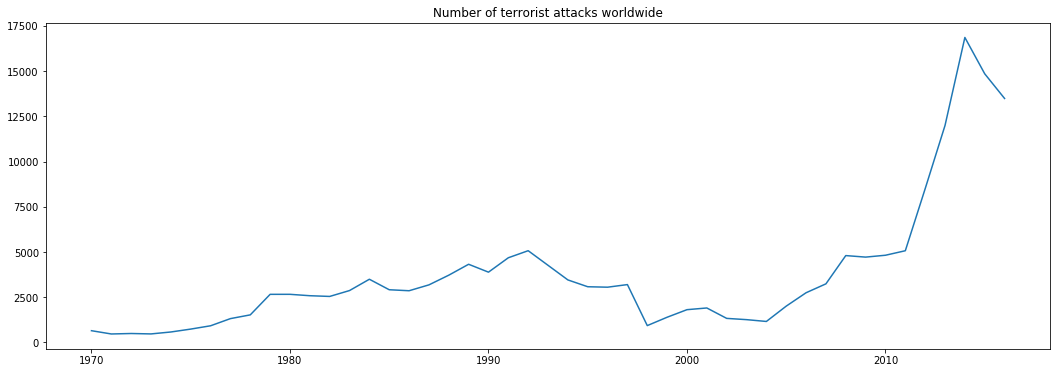

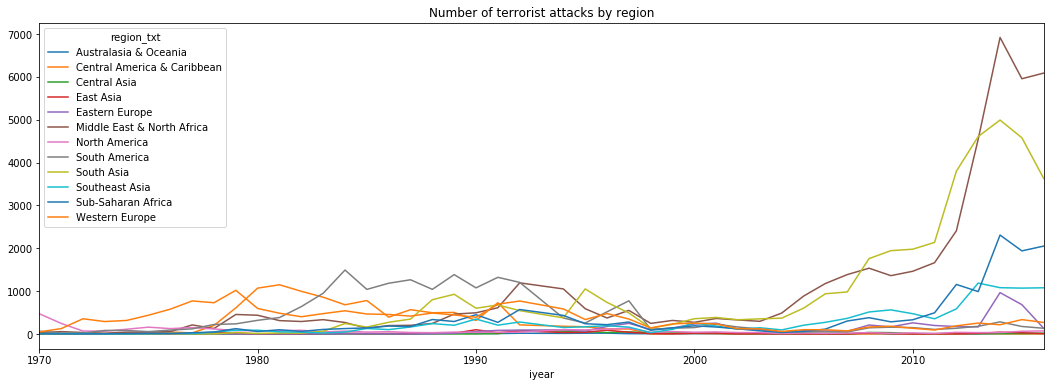

In [284]:
terror_overall = pd.Series(data['iyear'])
plt.plot(terror_overall.value_counts().sort_index())
fig_ovrl = plt.gcf()
fig_ovrl.set_size_inches(18,6)
plt.title('Number of terrorist attacks worldwide')
plt.show()

terror_region = pd.crosstab(data['iyear'], data['region_txt'])
terror_region.plot()
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title('Number of terrorist attacks by region')
plt.show()

## Number of victims per successful attack
Sadly, despite the increased precautions, the terrorists are more and more efficient.

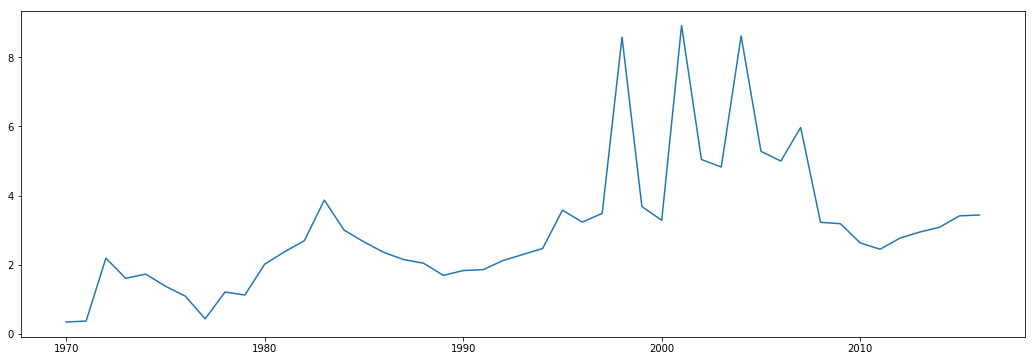

In [285]:
successful = data[data['success']==1]
#All data have the same length, so this is actually statistically correct
victims_per_attack = (np.asarray(successful.groupby('iyear')['nkill'].mean()) + np.asarray(successful.groupby('iyear')['nwound'].mean()))/2
years = np.unique(data['iyear'])
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.plot(years, victims_per_attack)
plt.show()

## Let's gather some more information about the 10 most fatal attacks

In [286]:
most_killed = data.nlargest(15, 'nkill')
for index, row in most_killed.iterrows():
    print ("The tragedy happened on ",row['iyear'], '-', row['imonth'], '-', row['iday'], '.', row['nkill'], "people were killed in an act of terrorism with", row['weaptype1_txt'],"in", row['city'], ',' , row['country_txt'],'.')


The tragedy happened on  2014 - 6 - 12 . 1500.0 people were killed in an act of terrorism with Firearms in Tikrit , Iraq .
The tragedy happened on  2001 - 9 - 11 . 1383.0 people were killed in an act of terrorism with Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs) in New York City , United States .
The tragedy happened on  2001 - 9 - 11 . 1382.0 people were killed in an act of terrorism with Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs) in New York City , United States .
The tragedy happened on  1994 - 4 - 13 . 1180.0 people were killed in an act of terrorism with Firearms in Gikoro , Rwanda .
The tragedy happened on  2014 - 6 - 10 . 670.0 people were killed in an act of terrorism with Explosives/Bombs/Dynamite in Badush , Iraq .
The tragedy happened on  2004 - 3 - 21 . 518.0 people were killed in an act of terrorism with Firearms in Dhading district , Nepal .
The tragedy happened on  2014 - 8 - 19 . 517.0 people were killed in

## What's the most popular weapon?

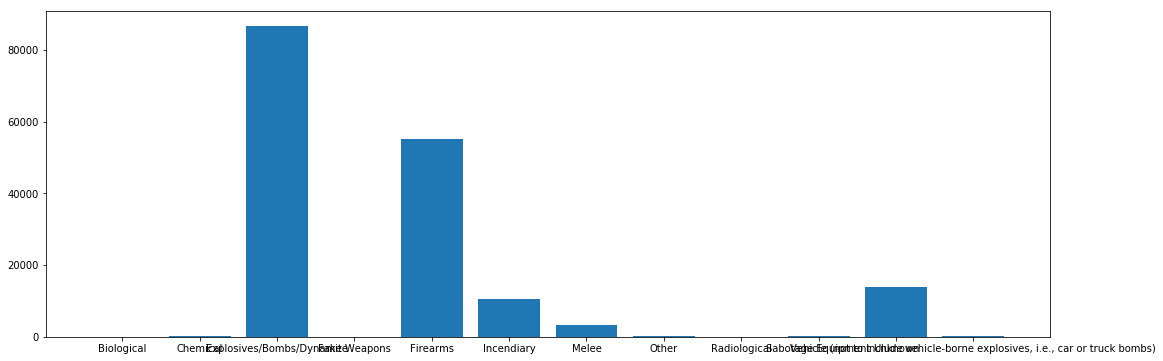

In [287]:
labels, values = zip(*Counter(data['weaptype1_txt']).items())
plt.bar(labels, values)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## On top of this all, how's Poland doing in terms of terrorism?

In [288]:
poland_attacks = data[data['country_txt']=='Poland']
print('There have been', len(poland_attacks), 'attacks in Poland in 1975-2016.', poland_attacks['nkill'].sum(), 'people were killed and', poland_attacks['nwound'].sum(), 'wounded in these attacks.')

There have been 36 attacks in Poland in 1975-2016. 7.0 people were killed and 31.0 wounded in these attacks.
